In [155]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA for Customers.csv

In [6]:
# Loading the Customers.csv dataset
file_path = 'Customers.csv'
customers_df = pd.read_csv(file_path)

In [8]:
# Looking at the first few rows and basic information about the dataset
print("First few rows of the dataset:")
print(customers_df.head())
print("\nDataset Information:")
print(customers_df.info())

First few rows of the dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [92]:
#Checking if there are any duplicates and counting their number
print("Duplicates in Customers dataset:", customers_df.duplicated().sum())

Duplicates in Customers dataset: 0


- From here we understand that there are a total of 200 records in this dataset with 4 coulmns whose names can be seen as above. Also we get to know that there no null values in any of these columns among the 200 records.

In [12]:
# Converting the SignupDate column to datetime format for analysis
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

In [14]:
customers_df['SignupDate']

0     2022-07-10
1     2022-02-13
2     2024-03-07
3     2022-10-09
4     2022-08-15
         ...    
195   2022-06-07
196   2023-03-21
197   2022-02-27
198   2022-12-03
199   2023-06-11
Name: SignupDate, Length: 200, dtype: datetime64[ns]

In [18]:
#Checking the range of signup dates by looking for the earliest and the latest dates
print("\nSignup Date Range:")
signup_date_range = (customers_df['SignupDate'].min(), customers_df['SignupDate'].max())
print(signup_date_range)


Signup Date Range:
(Timestamp('2022-01-22 00:00:00'), Timestamp('2024-12-28 00:00:00'))


In [24]:
#Checking the region wise distribution of customers for every unique region
print("\nRegion-wise Distribution:")
region_distribution = customers_df['Region'].value_counts()
print(region_distribution)


Region-wise Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


- From the above region wise distribution analysis we understand that the maximum number of customers are from South America and the least number of customers are from Asia.

In [55]:
# Analyzing customer signups over the time period- monthwise for better segregation of data
customers_df['SignupYearMonth'] = customers_df['SignupDate'].dt.to_period('M')
signup_trends = customers_df['SignupYearMonth'].value_counts().sort_index()

- To understand these trends better, we'll visualize it:

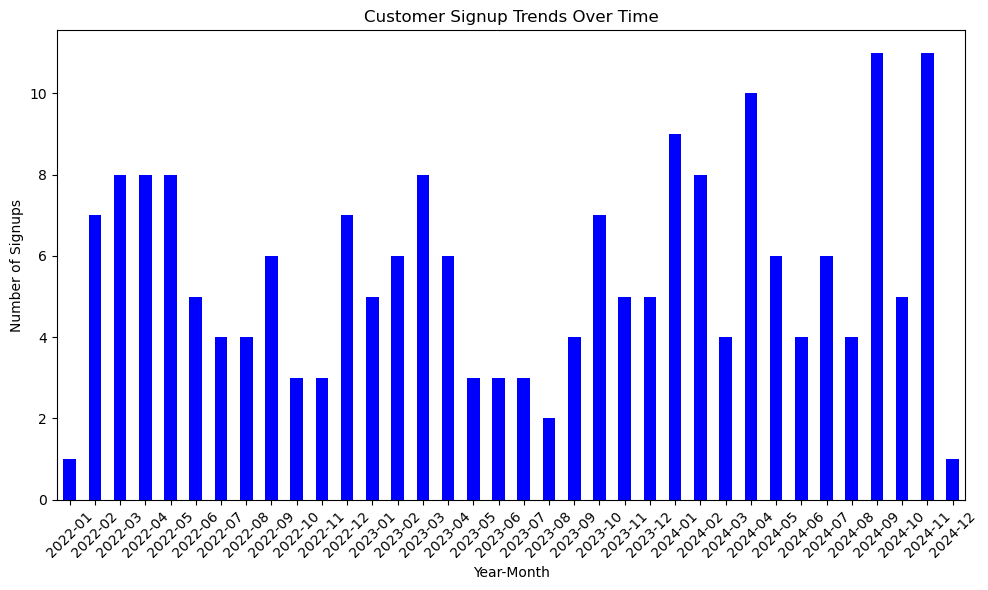

In [46]:
# Plotting the signup trends over time
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar', color='blue')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- From the above signup trends graph it is understood that there has been a periodic growth overtime and there is a sudden spike in the number at particular years which may indicate high marketing startegy for those periods.


Signup Trends by Region:
Region
Asia             45
Europe           50
North America    46
South America    59
Name: SignupDate, dtype: int64


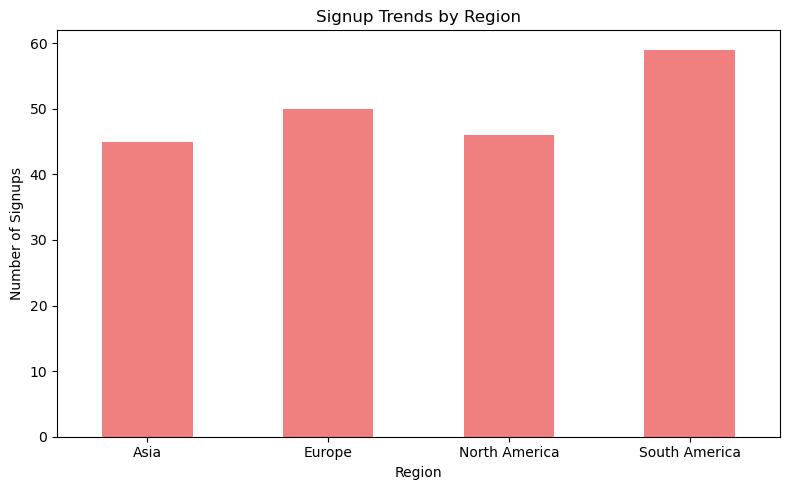

In [51]:
# Analyzing signup trends by region
signup_by_region = customers_df.groupby('Region')['SignupDate'].count()

print("\nSignup Trends by Region:")
print(signup_by_region)

# Visualizing signup trends by region
plt.figure(figsize=(8, 5))
signup_by_region.plot(kind='bar', color='lightcoral')
plt.title('Signup Trends by Region')
plt.xlabel('Region')
plt.ylabel('Number of Signups')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
print(customers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       200 non-null    object        
 1   CustomerName     200 non-null    object        
 2   Region           200 non-null    object        
 3   SignupDate       200 non-null    datetime64[ns]
 4   SignupYearMonth  200 non-null    period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 7.9+ KB
None


# EDA for Products.csv

In [58]:
# Loading the Products.csv dataset
file_path = 'Products.csv'
products_df = pd.read_csv(file_path)

In [60]:
# looking after the first few rows and basic information
print("First few rows of the dataset:")
print(products_df.head())
print("\nDataset Information:")
print(products_df.info())

First few rows of the dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [94]:
# Checking for duplicates and counting their number
print("Duplicates in Products dataset:", products_df.duplicated().sum())

Duplicates in Products dataset: 0


- From here it is understood that dataset contains a total of 100 records with 4 columns having no null values with the Price column having the datatype as float ideal for analysis.

In [63]:
# Summary of the statistics for the Price column
print("\nSummary of the Statistics for Price:")
price_summary = products_df['Price'].describe()
print(price_summary)


Summary of the Statistics for Price:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


- Through this we obtained the insights about minimum and maximum prices and the average price.

In [66]:
# Counting the no. of products in each category
print("\nProduct Count by Category:")
category_distribution = products_df['Category'].value_counts()
print(category_distribution)


Product Count by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


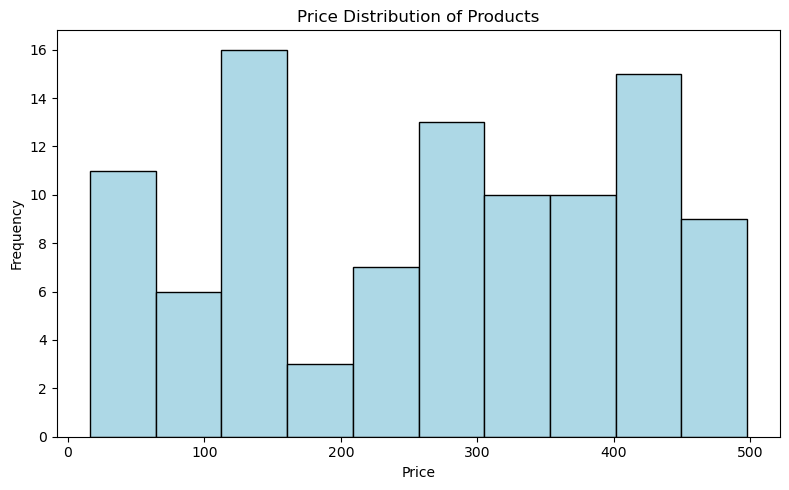

In [68]:
# Visualizing price distribution with the help of a histogram
plt.figure(figsize=(8, 5))
plt.hist(products_df['Price'], bins=10, color='lightblue', edgecolor='black')
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

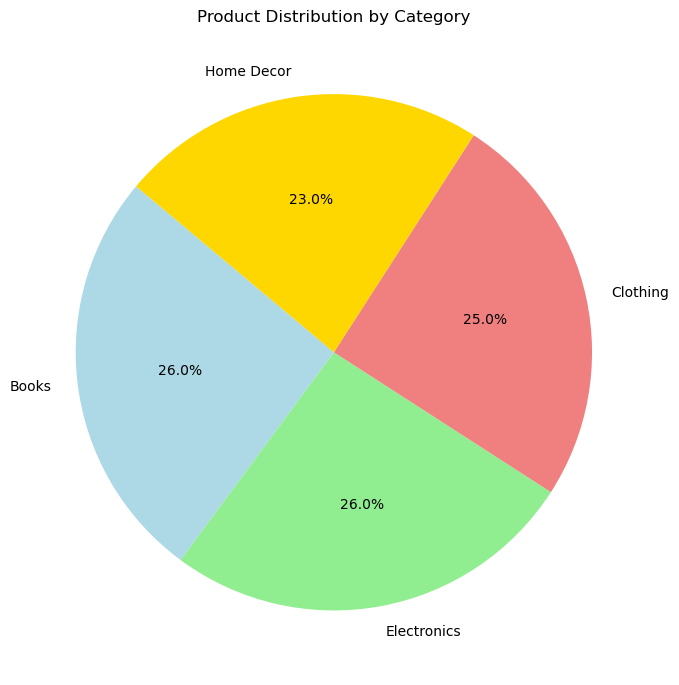

In [72]:
# Visualizing category distribution using pie chart
plt.figure(figsize=(7, 7))
category_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Product Distribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

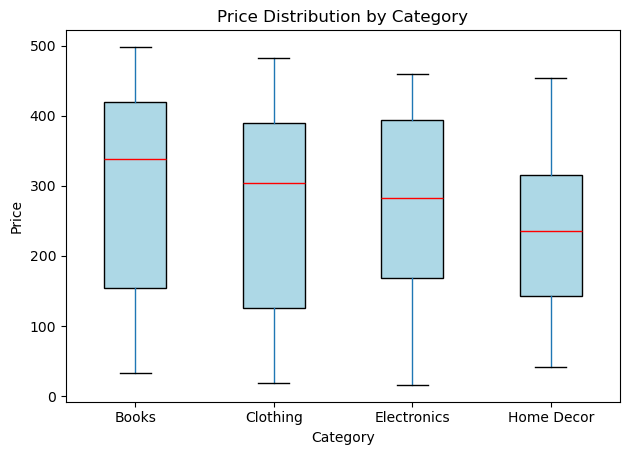

In [76]:
# Box plot for price distribution by category
plt.figure(figsize=(10, 6))
products_df.boxplot(column='Price', by='Category', grid=False, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.title('Price Distribution by Category')
plt.suptitle('')
plt.xlabel('Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


# EDA for Transactions.csv

In [85]:
# Loading the Transactions.csv dataset
file_path = 'Transactions.csv'  # Update this path if needed
transactions_df = pd.read_csv(file_path)

In [87]:
# Looking after the first few rows and basic information
print("First few rows of the dataset:")
print(transactions_df.head())
print("\nDataset Information:")
print(transactions_df.info())

First few rows of the dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   obj

- From this it is seen that the dataset contains a total of 1000 records with 7 columns having no null values.

In [96]:
#Checking for duplicates and counting their number
print("Duplicates in Transactions dataset:", transactions_df.duplicated().sum())

Duplicates in Transactions dataset: 0


In [102]:
# Converting TransactionDate to datetime format for better analysis
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['TransactionDate']

0     2024-08-25 12:38:23
1     2024-05-27 22:23:54
2     2024-04-25 07:38:55
3     2024-03-26 22:55:37
4     2024-03-21 15:10:10
              ...        
995   2024-10-24 08:30:27
996   2024-06-04 02:15:24
997   2024-04-05 13:05:32
998   2024-09-29 10:16:02
999   2024-04-21 10:52:24
Name: TransactionDate, Length: 1000, dtype: datetime64[ns]

In [104]:
# Getting the summary of statistics for all numeric columns present in the dataset- "Quantity", "TotalValue", "Price"
print("\nSummary Statistics for Numeric Columns:")
transaction_summary = transactions_df[['Quantity', 'TotalValue', 'Price']].describe()
print(transaction_summary)


Summary Statistics for Numeric Columns:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


- It is observed that:
- minimum quantity purchased is 1 and maximum quantity purchased is 4
- minimum total purchase value is 16.08 INR and maximum total purchase value is 1991.04 INR (assuming the currency to be INR)
- minimum price of any purchased product is 16.08 INR and maximum price of any purchased product is 497.76 INR

In [112]:
# Getting top 5 products according to their quantity sold
print("\nTop 5 Products by Quantity Sold:")
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head()
print(top_products)


Top 5 Products by Quantity Sold:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


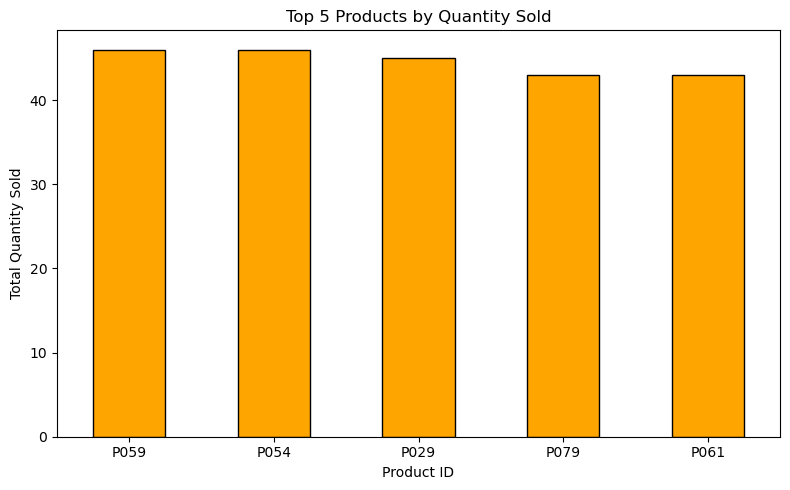

In [139]:
# Visualization of top products by quantity sold
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 5 Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [126]:
#Fetching these product names from their IDs from products dataset
top_product_ids = ['P059', 'P054', 'P029', 'P079', 'P061']

top_product_names = products_df[products_df['ProductID'].isin(top_product_ids)][['ProductID', 'ProductName']]

print("Top Product Names and Their IDs:")
print(top_product_names)

Top Product Names and Their IDs:
   ProductID          ProductName
28      P029   TechPro Headphones
53      P054   SoundWave Cookbook
58      P059      SoundWave Jeans
60      P061  HomeSense Desk Lamp
78      P079       ActiveWear Rug


In [110]:
# Extracting year and month for trend analysis for the transaction dates
transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
transactions_df['YearMonth']

0      2024-08
1      2024-05
2      2024-04
3      2024-03
4      2024-03
        ...   
995    2024-10
996    2024-06
997    2024-04
998    2024-09
999    2024-04
Name: YearMonth, Length: 1000, dtype: period[M]

In [132]:
# Sales trends over time- monthly
monthly_sales = transactions_df.groupby('YearMonth')['TotalValue'].sum()
monthly_sales

YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

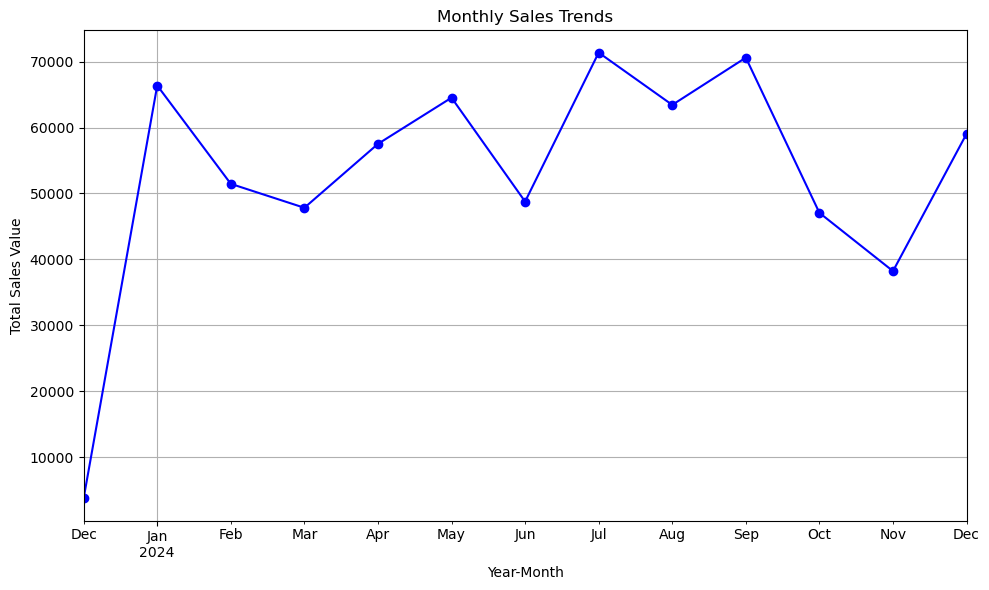

In [134]:
# Visualizing sales trends over time- monthly
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Value')
plt.grid()
plt.tight_layout()
plt.show()

- From this we can draw that sales fluctuate over time, with notable peaks and troughs which could indicate seasonal trends or the impact of specific specific marketing strategies

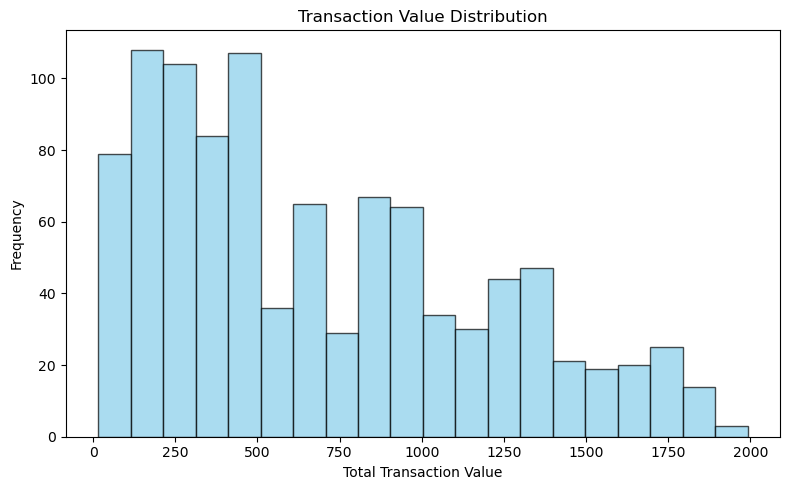

In [143]:
# Visualize transaction value distribution
plt.figure(figsize=(8, 5))
plt.hist(transactions_df['TotalValue'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Transaction Value Distribution')
plt.xlabel('Total Transaction Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

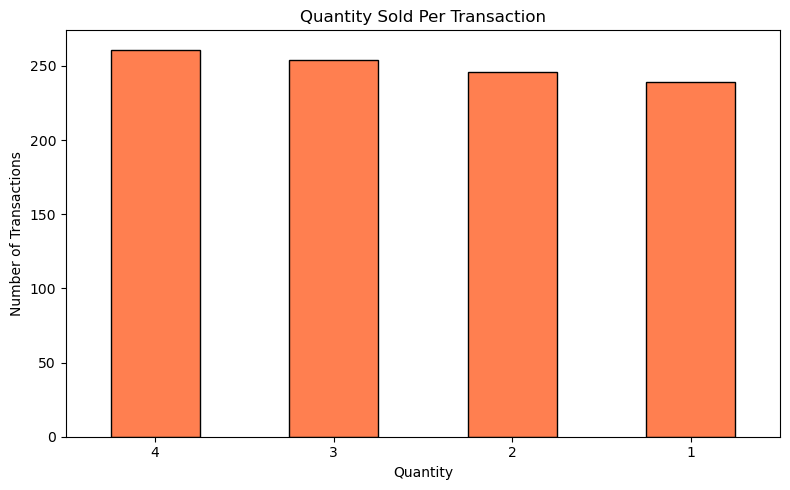

In [145]:
# Bar chart for quantity sold per transaction
quantity_counts = transactions_df['Quantity'].value_counts()

plt.figure(figsize=(8, 5))
quantity_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Quantity Sold Per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Cross-Dataset Analysis

## 1.Region wise Sales analysis

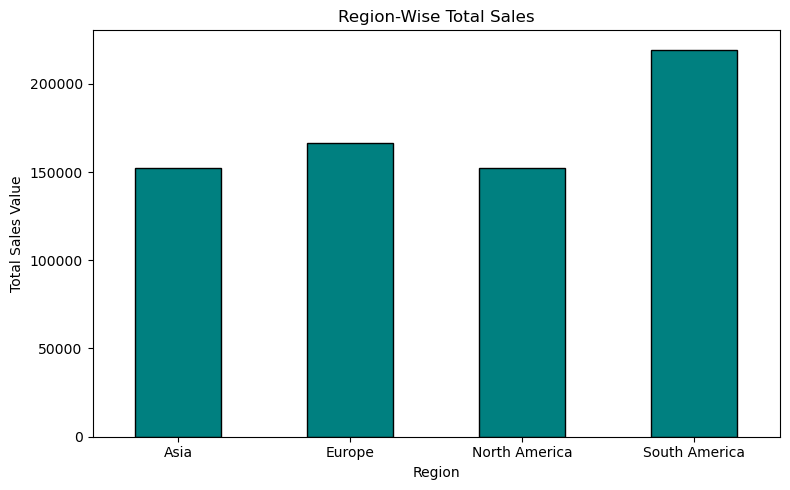

In [148]:
# Merging Customers.csv and Transactions.csv on CustomerID
region_sales_df = pd.merge(transactions_df, customers_df, on='CustomerID')

# Aggregating total sales by region
region_sales = region_sales_df.groupby('Region')['TotalValue'].sum()

# Visualizing region-wise sales
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Region-Wise Total Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Product popularity across regions

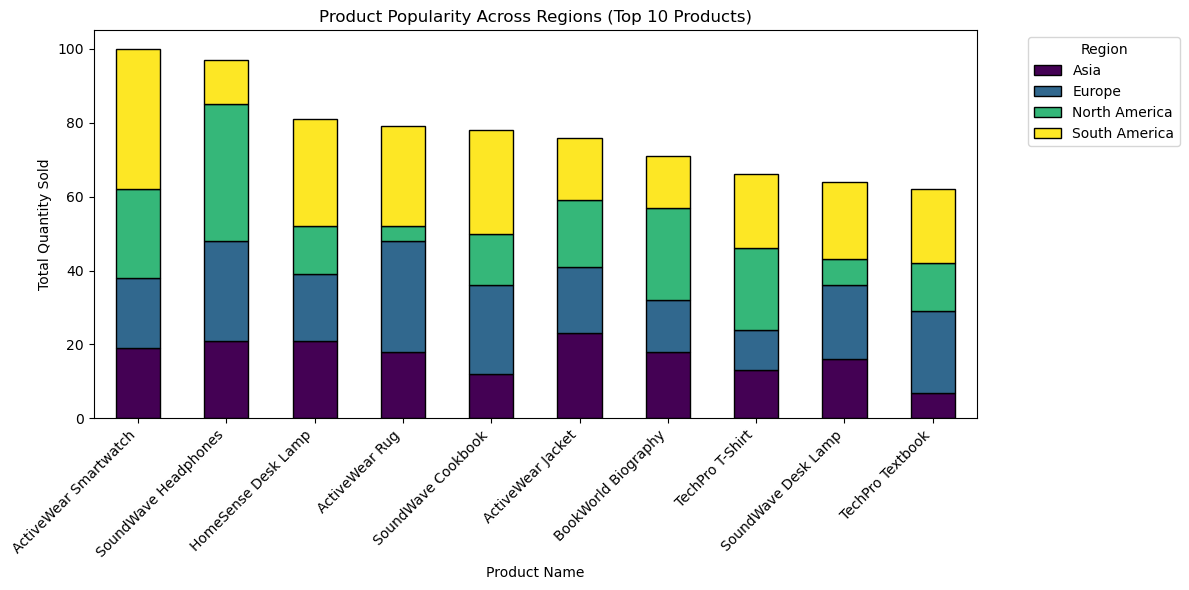

In [159]:
# Creating pivot table for stacked bar chart
pivot_product_region = region_product_popularity.pivot(index='ProductName', columns='Region', values='Quantity').fillna(0)

# Filtering to show only the top 10 products across all regions
top_products_overall = pivot_product_region.sum(axis=1).sort_values(ascending=False).head(10)
top_products_data = pivot_product_region.loc[top_products_overall.index]

# Stacked bar chart
top_products_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title('Product Popularity Across Regions (Top 10 Products)')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 3.Customer spending analysis by region

/var/folders/9p/3z_xg_v11rjb4scdkdt8ksn40000gn/T/ipykernel_21844/445900727.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_spending_region, x='Region', y='TotalValue', palette='coolwarm')


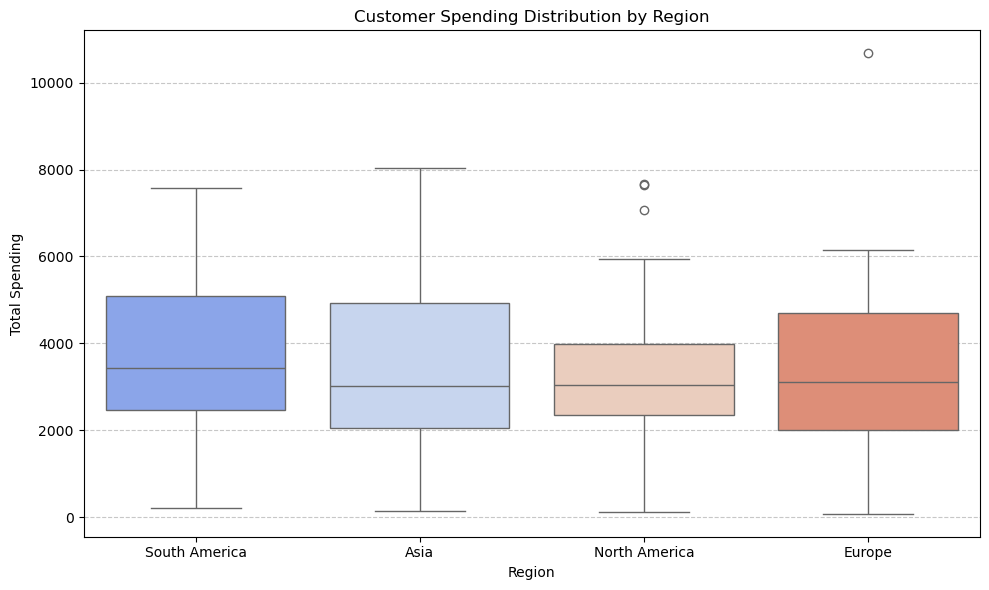

In [177]:
# Calculating total spending per customer
customer_spending = transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Mergimg with Customers.csv to include region
customer_spending_region = pd.merge(customer_spending, customers_df, on='CustomerID')

# Box plot for spending distribution by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_spending_region, x='Region', y='TotalValue', palette='coolwarm')
plt.title('Customer Spending Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4. Customer Lifetime Value(LTV)

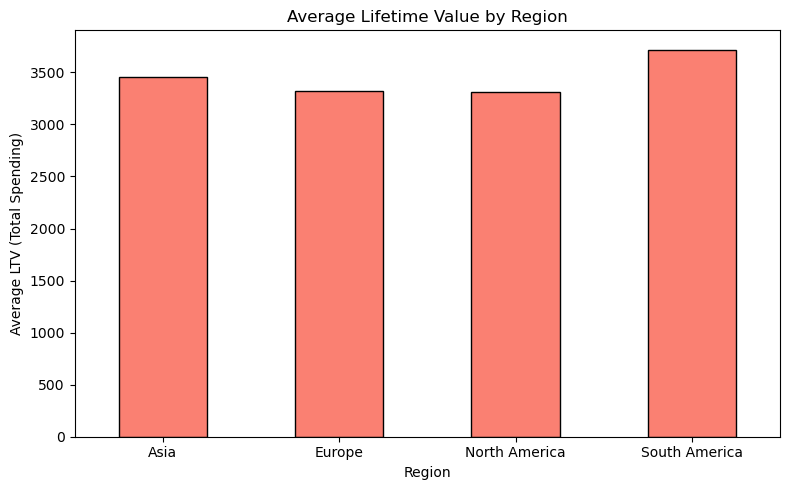

In [182]:
# Calculate lifetime value (total spending) per customer
customer_ltv = transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Merge with Customers.csv for region-level insights
customer_ltv_region = pd.merge(customer_ltv, customers_df, on='CustomerID')

# Group by region to calculate average LTV
region_ltv = customer_ltv_region.groupby('Region')['TotalValue'].mean()

# Visualize LTV by region
plt.figure(figsize=(8, 5))
region_ltv.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Lifetime Value by Region')
plt.xlabel('Region')
plt.ylabel('Average LTV (Total Spending)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 5. Category wise Sales Performance

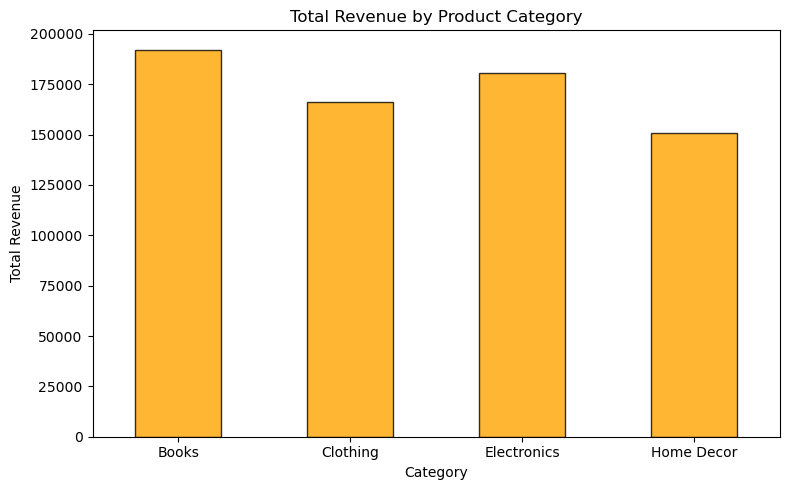

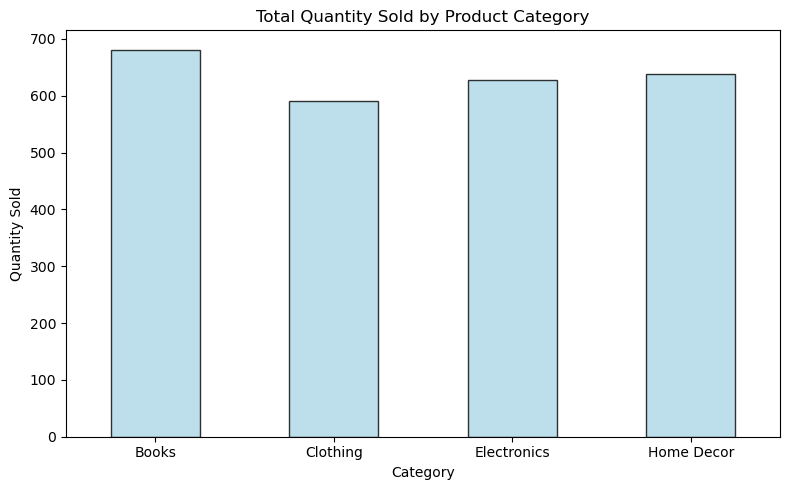

In [189]:
# Merge all datasets
merged_df = pd.merge(region_sales_df, products_df, on='ProductID')

# Group by Category to calculate total revenue and quantity sold
category_sales = merged_df.groupby('Category').agg({'TotalValue': 'sum', 'Quantity': 'sum'})

# Visualize category-wise sales performance
plt.figure(figsize=(8, 5))
category_sales['TotalValue'].plot(kind='bar', color='orange', edgecolor='black', alpha=0.8)
plt.title('Total Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualize category-wise quantity sold
plt.figure(figsize=(8, 5))
category_sales['Quantity'].plot(kind='bar', color='lightblue', edgecolor='black', alpha=0.8)
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Churn Analysis

In [192]:
# Calculating the time difference between transactions for each customer
transactions_df['LastTransactionDate'] = transactions_df.groupby('CustomerID')['TransactionDate'].shift(1)
transactions_df['DaysSinceLastTransaction'] = (transactions_df['TransactionDate'] - transactions_df['LastTransactionDate']).dt.days

# Identifying customers with significant gaps between transactions (>30 days)
churn_customers = transactions_df[transactions_df['DaysSinceLastTransaction'] > 30]['CustomerID'].unique()

print("Customers potentially at risk of churn (inactive for 30+ days):")
print(churn_customers)

Customers potentially at risk of churn (inactive for 30+ days):
['C0087' 'C0028' 'C0188' 'C0070' 'C0146' 'C0065' 'C0012' 'C0194' 'C0017'
 'C0109' 'C0064' 'C0183' 'C0122' 'C0162' 'C0124' 'C0165' 'C0086' 'C0056'
 'C0088' 'C0113' 'C0125' 'C0048' 'C0184' 'C0148' 'C0103' 'C0156' 'C0004'
 'C0181' 'C0093' 'C0008' 'C0145' 'C0167' 'C0038' 'C0200' 'C0090' 'C0018'
 'C0075' 'C0027' 'C0178' 'C0172' 'C0116' 'C0043' 'C0041' 'C0126' 'C0006'
 'C0106' 'C0136' 'C0046' 'C0128' 'C0159' 'C0059' 'C0082' 'C0081' 'C0139'
 'C0035' 'C0141' 'C0142' 'C0155' 'C0092' 'C0010' 'C0101' 'C0084' 'C0022'
 'C0047' 'C0153' 'C0009' 'C0085' 'C0189' 'C0096' 'C0026' 'C0197' 'C0190'
 'C0160' 'C0161' 'C0168' 'C0102' 'C0053' 'C0051' 'C0016' 'C0154' 'C0025'
 'C0140' 'C0199' 'C0104' 'C0121' 'C0001' 'C0039' 'C0098' 'C0157' 'C0045'
 'C0021' 'C0152' 'C0068' 'C0100' 'C0032' 'C0037' 'C0170' 'C0127' 'C0179'
 'C0173' 'C0023' 'C0171' 'C0187' 'C0079' 'C0077' 'C0091' 'C0111' 'C0108'
 'C0147' 'C0119' 'C0024' 'C0007' 'C0117' 'C0011' 'C0013' 'C0

- These customers info can be pulled out using these cutomer IDs from the customers.csv